In [1]:
# Summary
🔹 Why do we use fit_transform for the training dataset and only transform for the test dataset?

🔹 Why should we scale features after splitting into X and Y?

🔹 What is data leakage, and how does it impact model performance?

🔹 Why should we avoid scaling the target variable?

🔹 When should we scale the target variable?

🔹 Why do we determine coefficients and intercepts after training a linear regression model?

🔹 What are the key assumptions for Linear Regression?

🔹 How do we check if the model is generalized?

Object `dataset` not found.
Object `Y` not found.
Object `performance` not found.
Object `variable` not found.
Object `variable` not found.
Object `model` not found.
Object `Regression` not found.
Object `generalized` not found.


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

#  Simple Linear Regression

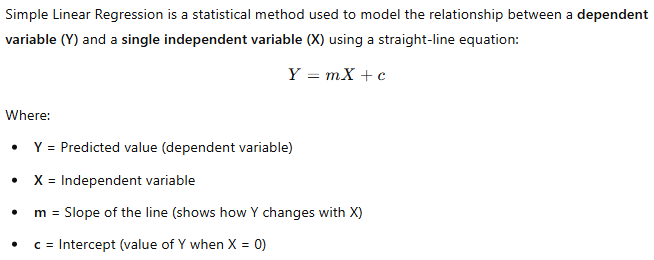

# Using Load_diabetes dataset to practuce simple Linear Regression

In [6]:
from sklearn.datasets import load_diabetes

In [7]:
diabetes = load_diabetes()

In [8]:
df = pd.DataFrame(data = diabetes.data, columns = diabetes.feature_names)

In [9]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [10]:
df["target"] = diabetes.target

In [11]:
df.head(10)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
5,-0.092695,-0.044642,-0.040696,-0.019442,-0.068991,-0.079288,0.041277,-0.076395,-0.041176,-0.096346,97.0
6,-0.045472,0.050680,-0.047163,-0.015999,-0.040096,-0.024800,0.000779,-0.039493,-0.062917,-0.038357,138.0
7,0.063504,0.050680,-0.001895,0.066629,0.090620,0.108914,0.022869,0.017703,-0.035816,0.003064,63.0
8,0.041708,0.050680,0.061696,-0.040099,-0.013953,0.006202,-0.028674,-0.002592,-0.014960,0.011349,110.0
9,-0.070900,-0.044642,0.039062,-0.033213,-0.012577,-0.034508,-0.024993,-0.002592,0.067737,-0.013504,310.0


In [12]:
corr_mat = df.corr()
corr_mat["target"]

age       0.187889
sex       0.043062
bmi       0.586450
bp        0.441482
s1        0.212022
s2        0.174054
s3       -0.394789
s4        0.430453
s5        0.565883
s6        0.382483
target    1.000000
Name: target, dtype: float64

In [69]:
XX = df.drop(columns="target")

In [73]:
# Calculate VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["feature"] = XX.columns
vif_data["VIF"] = [variance_inflation_factor(XX.values, i) for i in range(XX.shape[1])]

# Display VIF scores
print(vif_data)

  feature        VIF
0     age   1.217307
1     sex   1.278071
2     bmi   1.509437
3      bp   1.459428
4      s1  59.202510
5      s2  39.193370
6      s3  15.402156
7      s4   8.890986
8      s5  10.075967
9      s6   1.484623


# Select Feature & Target Variable

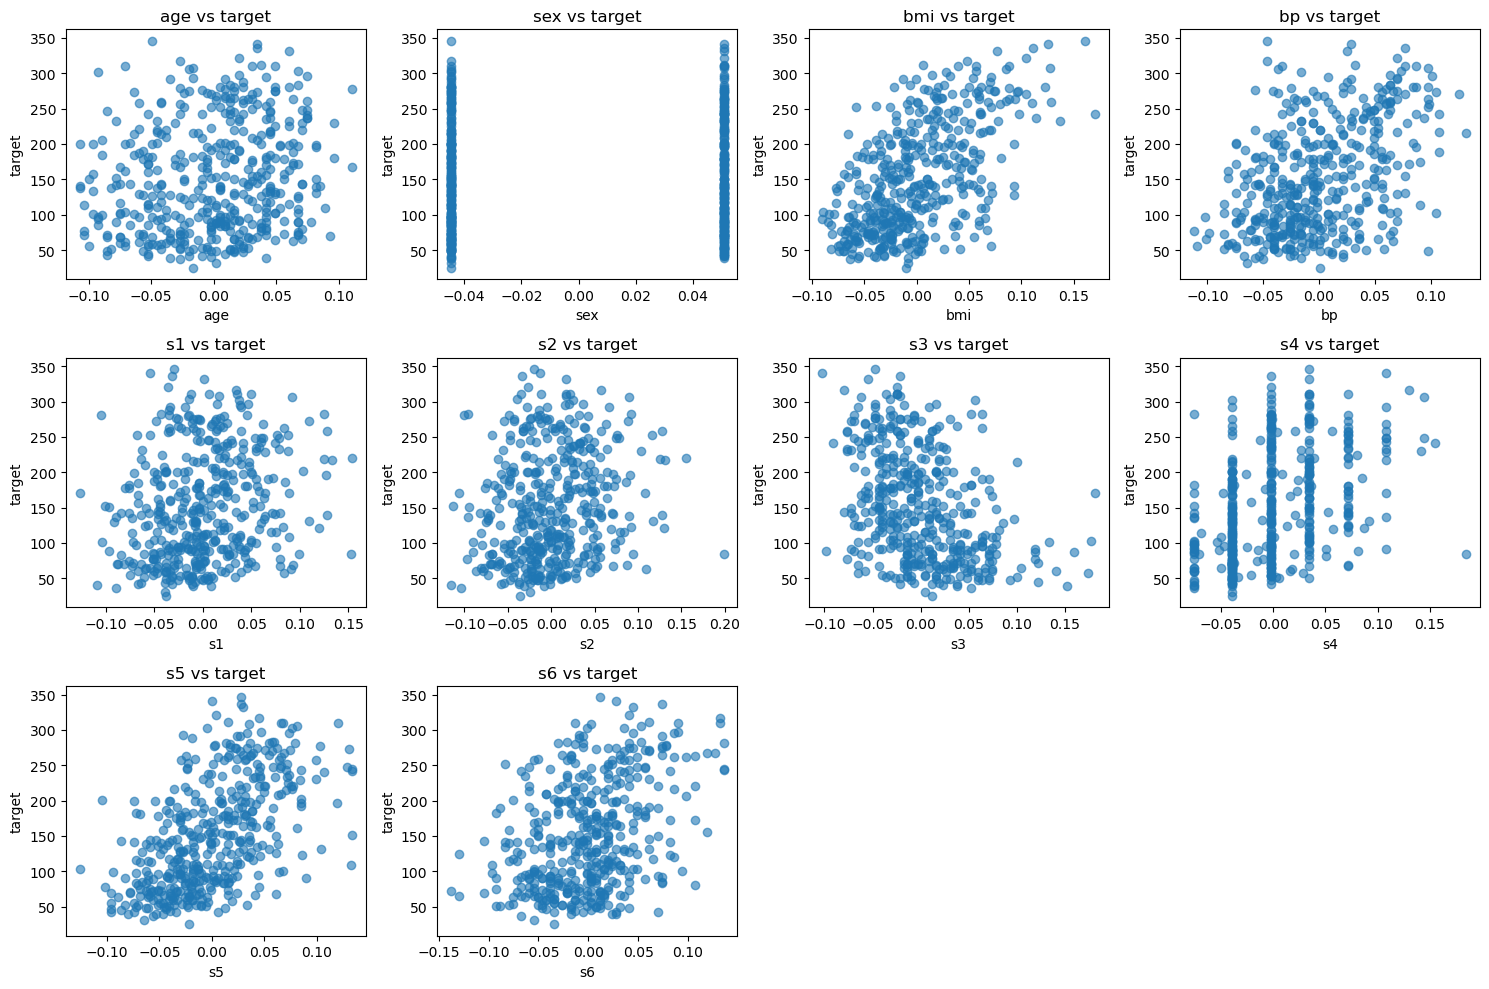

In [14]:
# Set up the plot
plt.figure(figsize=(15, 10))

# Loop through all features and plot scatter plots
for i, feature in enumerate(diabetes.feature_names):
    plt.subplot(3, 4, i + 1)  # 3 rows, 4 columns grid
    plt.scatter(df[feature], df['target'], alpha=0.6)
    plt.xlabel(feature)
    plt.ylabel('target')
    plt.title(f'{feature} vs target')

plt.tight_layout()
plt.show()

- Lets Choose BMI for practicing Linear regression 

In [16]:
X = df["bmi"]

In [17]:
y = df.target

# Assumptions to dtermne if the data follows Linearity or is Non Linear in Nature
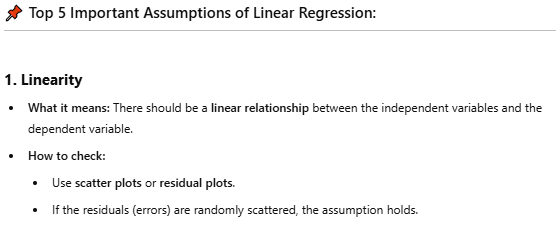 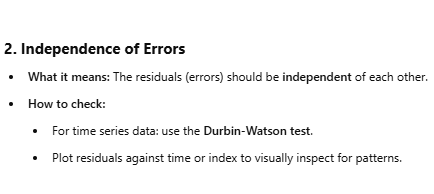
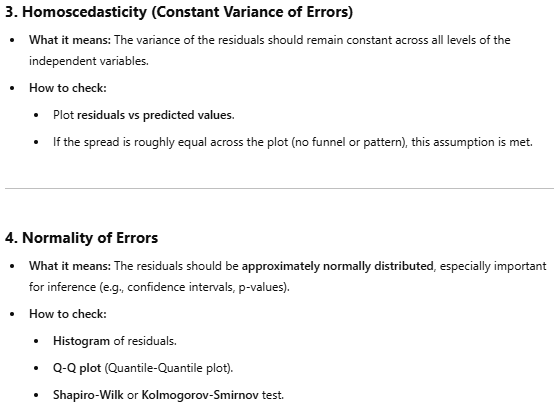 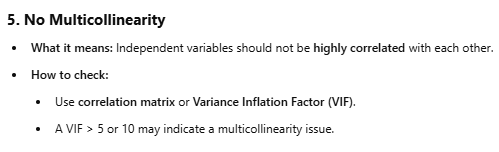

### 1) Check for Linearity between bmi and target

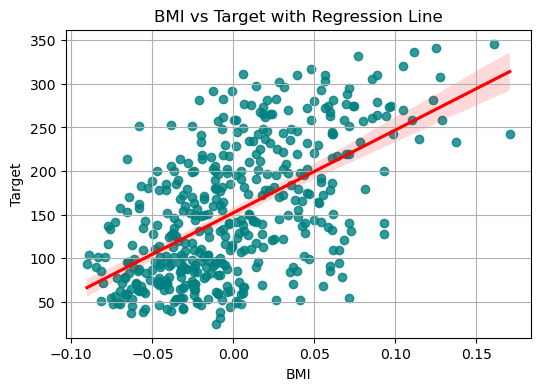

In [20]:
# Plot scatter plot with regression line
plt.figure(figsize=(6, 4))
sns.regplot(x='bmi', y='target', data=df, color='teal', line_kws={"color": "red"})
plt.xlabel('BMI')
plt.ylabel('Target')
plt.title('BMI vs Target with Regression Line')
plt.grid(True)
plt.show()

### 2) Check for the Homoscdecity by determine and plotting the residulas on the scatter plot

In [22]:


# Reshape BMI feature for model training
X = df[['bmi']]  # Features (must be 2D)
y = df['target']  # Target
from sklearn.linear_model import LinearRegression

# Train the Linear Regression model
model = LinearRegression()
model.fit(X, y)

# Predict target values
y_pred = model.predict(X)

# Calculate residuals
residuals = y - y_pred

# Print first 5 residuals
print("First 5 residuals:")
print(residuals.head())

First 5 residuals:
0   -59.710038
1   -28.262195
2   -53.337033
3    64.875231
4    17.411426
Name: target, dtype: float64


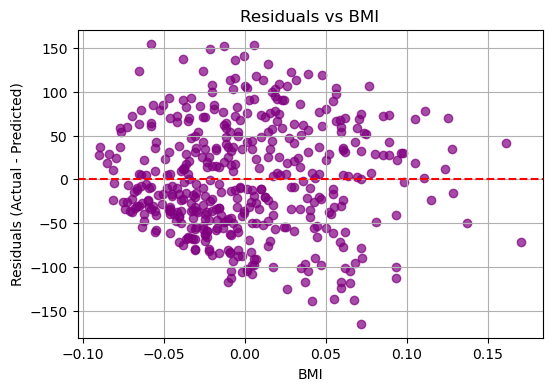

In [23]:
# Plot residuals vs BMI
plt.figure(figsize=(6, 4))
plt.scatter(df['bmi'], residuals, color='purple', alpha=0.7)
plt.axhline(y=0, color='red', linestyle='--')  # Line at zero residual
plt.xlabel('BMI')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residuals vs BMI')
plt.grid(True)
plt.show()

- there doesnot seem to be any pattern in residual plot for bmi , so we can say it hold the Homoscdecity assumption well

### 3) No need to checck for the multicolinearity in Simplr Linear Regression 
    

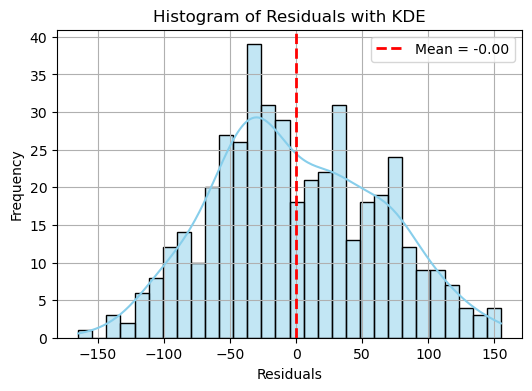

In [26]:
# Calculate mean of residuals
mean_residual = residuals.mean()

# Plot histogram with KDE and mean line
plt.figure(figsize=(6, 4))
sns.histplot(residuals, bins=30, kde=True, color='skyblue', edgecolor='black')

# Add a vertical line at the mean
plt.axvline(mean_residual, color='red', linestyle='--', linewidth=2, label=f'Mean = {mean_residual:.2f}')

# Plot settings
plt.title("Histogram of Residuals with KDE")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.show()

- Histogram	Bell-shaped curve centered at 0

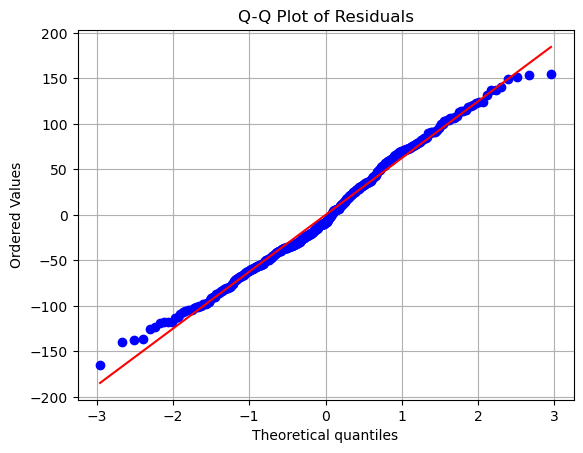

In [28]:
import scipy.stats as stats

stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot of Residuals")
plt.grid(True)
plt.show()


- Q-Q Plot	Points close to the diagonal line

## hence we confirm this data set follows Linearity and Linear Regression with Degree 1 is perfect for it to train on.

# Apply Linear Regression Machine Learning model 

In [32]:
# Standardize the data
from sklearn.preprocessing import StandardScaler

# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


- No, you do not need to standardize y (the target variable) for basic linear regression.
- Linear regression automatically fits a line that minimizes the squared difference between actual y and predicted y.

- Standardizing y does not change the model’s performance or predictions — it just changes the scale of the output.

- The interpretability of your model might actually decrease if you scale y, because your predictions will be in standardized units instead of the original (e.g., disease progression, dollars, etc.).



In [34]:
# Split into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [35]:
# Train gthe train dataset on Linear Regression Ml model
from sklearn.linear_model import LinearRegression

model = LinearRegression()


In [36]:
# Train the model on the training data
model.fit(X_train, y_train)

LinearRegression()

In [37]:
# Predict on the test data
y_pred = model.predict(X_test)


In [38]:
# Evaluation metics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [39]:
# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Display the results
print("Test set evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

Test set evaluation Metrics:
Mean Absolute Error (MAE): 52.26
Mean Squared Error (MSE): 4061.83
Root Mean Squared Error (RMSE): 63.73
R² Score: 0.23


In [40]:
# Predict on the training data
y_train_pred = model.predict(X_train)

In [41]:
# Calculate evaluation metrics for training set
mae_train = mean_absolute_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_train_pred)

# Display the results
print(f"Training Set Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae_train:.2f}")
print(f"Mean Squared Error (MSE): {mse_train:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_train:.2f}")
print(f"R² Score: {r2_train:.2f}")

Training Set Evaluation Metrics:
Mean Absolute Error (MAE): 51.38
Mean Squared Error (MSE): 3854.11
Root Mean Squared Error (RMSE): 62.08
R² Score: 0.37


# Multivariate Analysis
- Because this medical data didnt workwel with single feature vs taarget variable, this might be indicating that other features equal or ore imprtance as well in predicting the taget variable


In [125]:
X = df.drop(columns="target")

In [127]:
y = df["target"]

In [129]:
# Drop the 's1' feature from X
X = X.drop(columns='s1')


In [131]:
# # Drop the 's4' feature from X
# X = X.drop(columns='s4')

In [133]:
# Calculate VIF
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display the VIF values
print(vif_data)

  feature       VIF
0     age  1.216892
1     sex  1.275049
2     bmi  1.502320
3      bp  1.457413
4      s2  2.926535
5      s3  3.736890
6      s4  7.818670
7      s5  2.172865
8      s6  1.484410


In [135]:
# Standardize the data
from sklearn.preprocessing import StandardScaler

# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [137]:
# Split into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [139]:
# Train gthe train dataset on Linear Regression Ml model
from sklearn.linear_model import LinearRegression

model = LinearRegression()


In [141]:
# Train the model on the training data
model.fit(X_train, y_train)

LinearRegression()

In [143]:
# Predict on the test data
y_pred = model.predict(X_test)


In [145]:
# Evaluation metics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [147]:
# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Display the results
print("Test set evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

Test set evaluation Metrics:
Mean Absolute Error (MAE): 42.87
Mean Squared Error (MSE): 2874.36
Root Mean Squared Error (RMSE): 53.61
R² Score: 0.46


In [149]:
# Predict on the training data
y_train_pred = model.predict(X_train)

In [151]:
# Calculate evaluation metrics for training set
mae_train = mean_absolute_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_train_pred)

# Display the results
print(f"Training Set Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae_train:.2f}")
print(f"Mean Squared Error (MSE): {mse_train:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_train:.2f}")
print(f"R² Score: {r2_train:.2f}")

Training Set Evaluation Metrics:
Mean Absolute Error (MAE): 43.76
Mean Squared Error (MSE): 2904.31
Root Mean Squared Error (RMSE): 53.89
R² Score: 0.52


Possible reason :
- This medical data might work well in combination with other data such as :
Genetic factors

Lifestyle data

Past medical history

Diet/exercise patterns
- Outliers could also be the reason but since the data is medical domain outliers are expexted to me valid values in it.
